

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [2]:
import urllib.request

proxy_support = urllib.request.ProxyHandler({'http' : 'http://proxy.com:8080', 
                                             'https': 'http://proxy.com:8080'})
opener = urllib.request.build_opener(proxy_support)
urllib.request.install_opener(opener)

In [3]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

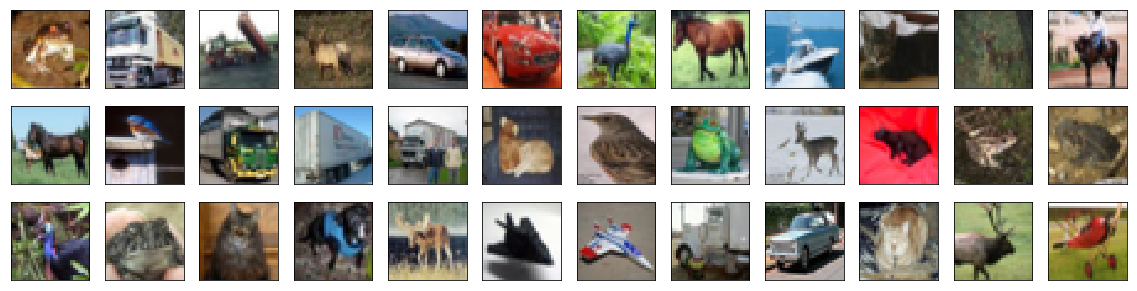

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [6]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [7]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [9]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [10]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=1, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 114s 3ms/step - loss: 1.6216 - acc: 0.4147 - val_loss: 1.5592 - val_acc: 0.4316

Epoch 00001: val_loss improved from inf to 1.55921, saving model to model.weights.best.hdf5
Epoch 2/100
45000/45000 [==============================] - 113s 3ms/step - loss: 1.2988 - acc: 0.5358 - val_loss: 1.2213 - val_acc: 0.5668

Epoch 00002: val_loss improved from 1.55921 to 1.22132, saving model to model.weights.best.hdf5
Epoch 3/100
45000/45000 [==============================] - 98s 2ms/step - loss: 1.1756 - acc: 0.5807 - val_loss: 1.1674 - val_acc: 0.5922loss: 1.1760 - acc: - ETA: 0s - loss: 1.1758 - acc: 0.

Epoch 00003: val_loss improved from 1.22132 to 1.16741, saving model to model.weights.best.hdf5
Epoch 4/100
45000/45000 [==============================] - 98s 2ms/step - loss: 1.1043 - acc: 0.6089 - val_loss: 1.2042 - val_acc: 0.5820

Epoch 00004: val_loss did not improve from 1.16741
Epoc

45000/45000 [==============================] - 100s 2ms/step - loss: 1.4550 - acc: 0.5107 - val_loss: 1.9354 - val_acc: 0.4562

Epoch 00042: val_loss did not improve from 0.95587
Epoch 43/100
45000/45000 [==============================] - 101s 2ms/step - loss: 1.4559 - acc: 0.5093 - val_loss: 1.7822 - val_acc: 0.4574

Epoch 00043: val_loss did not improve from 0.95587
Epoch 44/100
45000/45000 [==============================] - 100s 2ms/step - loss: 1.4768 - acc: 0.5031 - val_loss: 1.3262 - val_acc: 0.5492

Epoch 00044: val_loss did not improve from 0.95587
Epoch 45/100
45000/45000 [==============================] - 101s 2ms/step - loss: 1.4796 - acc: 0.5025 - val_loss: 1.8135 - val_acc: 0.4920

Epoch 00045: val_loss did not improve from 0.95587
Epoch 46/100
45000/45000 [==============================] - 101s 2ms/step - loss: 1.4995 - acc: 0.4951 - val_loss: 1.4605 - val_acc: 0.4850

Epoch 00046: val_loss did not improve from 0.95587
Epoch 47/100
45000/45000 [===========================

45000/45000 [==============================] - 97s 2ms/step - loss: 1.8105 - acc: 0.3626 - val_loss: 2.0038 - val_acc: 0.3604

Epoch 00085: val_loss did not improve from 0.95587
Epoch 86/100
45000/45000 [==============================] - 106s 2ms/step - loss: 1.8134 - acc: 0.3630 - val_loss: 1.5766 - val_acc: 0.4480

Epoch 00086: val_loss did not improve from 0.95587
Epoch 87/100
45000/45000 [==============================] - 103s 2ms/step - loss: 1.8153 - acc: 0.3622 - val_loss: 1.5584 - val_acc: 0.4394

Epoch 00087: val_loss did not improve from 0.95587
Epoch 88/100
45000/45000 [==============================] - 115s 3ms/step - loss: 1.7995 - acc: 0.3648 - val_loss: 1.6757 - val_acc: 0.3748

Epoch 00088: val_loss did not improve from 0.95587
Epoch 89/100
45000/45000 [==============================] - 124s 3ms/step - loss: 1.8139 - acc: 0.3588 - val_loss: 1.5995 - val_acc: 0.4052

Epoch 00089: val_loss did not improve from 0.95587
Epoch 90/100
45000/45000 [============================

### 8. Load the Model with the Best Validation Accuracy

In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [12]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6697


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [13]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

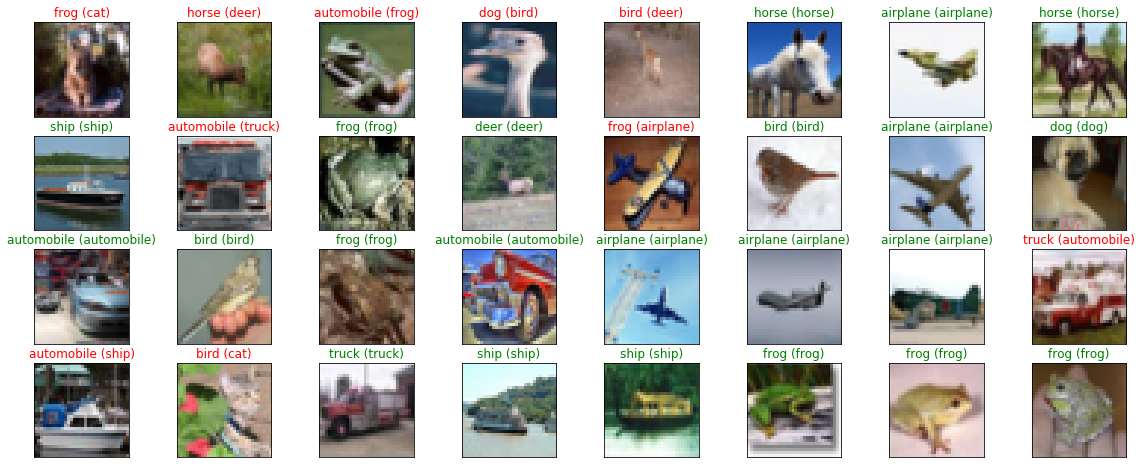

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))